[ 0.4722814   0.50312966  0.65752694  0.51700334  0.45482356  0.60074868
  0.38391405  0.67927711  0.          0.62352835  0.53588361  0.5968148
  0.15336944 -0.12008935 -0.04056259  0.0161255  -0.00588165  0.07724269
 -0.13466672  0.          0.02644478  0.06631603  0.08257416  0.12419596
  0.07924654  0.          0.06838594  0.09025477  0.35909902  0.45712877
  0.41838952  0.35365719  0.43697478  0.18629521 -0.06857318  0.14313508
  0.          0.21331956  0.11546637  0.12816805  0.208495    0.16010958
  0.04289415  0.15155437  0.12986645  0.15124325  0.04705483  0.12157189
  0.1147203   0.18151087  0.19148852  0.25543671  0.17284625  0.25639858
 -0.10500298  0.          0.28139383  0.21786017  0.18159469  0.11396058
  0.21248881  0.22172596  0.23455007  0.15632972  0.0414655   0.1686405
  0.23008468  0.10683936  0.06672055  0.19938305  0.25393983  0.29539913
  0.2177518   0.11387875  0.22590179  0.16071602  0.11501122  0.0122816
  0.19889553  0.18414387 -0.02140164  0.17566189  0.16

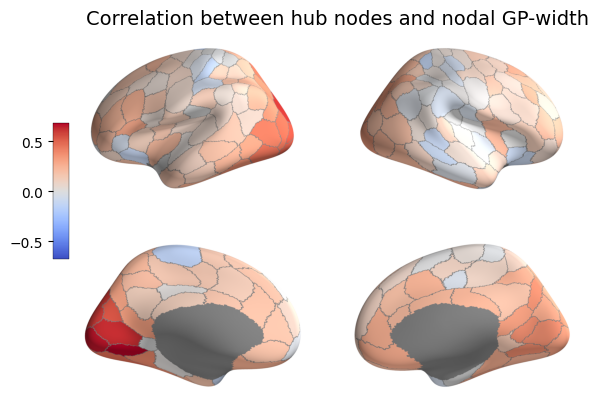

<Figure size 1200x1700 with 0 Axes>

In [1]:
# For both positive and negative correlations

from crosspy.postprocessing.visualization import vis_3d
from crosspy.postprocessing.visualization import utils
import pylab as plt
import os
import os.path as op
import numpy as np
import pickle
import glob

import pandas as pd
import itertools
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import pandas as pd

def get_subsystem(parcel_name, use_hemi=True):
    if ('LH' in parcel_name) or ('RH' in parcel_name):
        tokens = parcel_name.split('_')
        if use_hemi:
            return '_'.join(tokens[1:3])
        else:
            return tokens[2]       
    return 'subcortical'


data_directory = "//home.org.aalto.fi/knapics1/data/Desktop/Courses/Thesis/brainplots/"
file_pattern = "brain_sign_data_*.npy"
#data_directory_out = "//home.org.aalto.fi/knapics1/data/Desktop/Courses/Thesis/brainplots/plots/"
data_directory_out = "/Users/aleksisormunen/Downloads/Aleksi/master_thesis/brain_plots"
# List all files matching the naming pattern
file_paths = glob.glob(os.path.join(data_directory, file_pattern))
# Working directory:
#subject_path = "//home.org.aalto.fi/knapics1/data/Desktop/Courses/Thesis/triton_data/fsaverage/" # parcels
subject_path = "/Users/aleksisormunen/Downloads/Aleksi/master_thesis/fsaverage" # parcels

targets = ['ContA', 'ContB', 'ContC', 'DefaultA', 'DefaultB', 'DefaultC',
       'DorsAttnA', 'DorsAttnB', 'LimbicA', 'LimbicB', 'SalVentAttnA',
       'SalVentAttnB', 'SomMotA', 'SomMotB', 'TempPar', 'VisCent',
       'VisPeri', 'subcortical']

brain_surf_lh = vis_3d.BrainSurface(subject_path, parcellation='Schaefer2018_200Parcels_17Networks_order',
                             hemis=['lh'], surface='inflated')
brain_surf_rh = vis_3d.BrainSurface(subject_path, parcellation='Schaefer2018_200Parcels_17Networks_order',
                             hemis=['rh'], surface='inflated')

surf_parcel_names = brain_surf_lh.parcel_names[1:] + brain_surf_rh.parcel_names[1:]
indexes = np.argsort(surf_parcel_names)

parcel_names = list()

#with open('//home.org.aalto.fi/knapics1/data/Desktop/Courses/Thesis/triton_data/derivatives/text_files/17_200/fs_yeo.txt', 'r') as fin:
with open('/Users/aleksisormunen/Downloads/Aleksi/master_thesis/text_files/17_200/fs_yeo.txt', 'r') as fin:
    for line in filter(lambda x: len(x.strip()) > 0, fin):
        _, name, *_ = line.split()
        
        if name.lower() != 'unknown':
            parcel_names.append(name)
parcel_names = parcel_names[:200]
indexes_data = np.argsort(parcel_names)

values = np.random.normal(0.1, 0.01, (200))
#path_dir = "//home.org.aalto.fi/knapics1/data/Desktop/Courses/Thesis/correlation_data/CORRECT/clinical_all/nodestrength/pearson_nocorrection/"
path_dir = "/Users/aleksisormunen/Downloads/Aleksi/master_thesis/correlation_data/"

#name_file = "corr_data_SDST0_nodestrength"
name_file = "hub_values_correlations"

data = np.load(f"{path_dir}{name_file}.npy")
#data = np.load(f"{path_dir}{name_file}.npy")[:200]
print(data)
data_sort = data[indexes_data]
values[indexes] = data_sort

brain_3d_surfaces = [brain_surf_lh, brain_surf_rh]

fig, axes = plt.subplots(ncols=2, nrows=2)

values_to_plot = values[np.abs(values) > 0]
parcel_names_to_plot = [n for (v, n) in zip(values, surf_parcel_names) if np.abs(v) > 0]

limits = (-np.max(np.abs(values)),np.max(np.abs(values)))
print(limits)
if np.max(values) == 0:
    limits=(-0.1,0.1)

# Draw the four views with the updated values and title
utils.draw_four_views(axes, values_to_plot, parcel_names_to_plot, brain_3d_surfaces, n_parcels=200,title_kwargs={'fontsize': 14},
                      cmap='coolwarm', title="Correlation between hub nodes and nodal GP-width", norm_values=limits)

cmap_obj = plt.get_cmap('coolwarm')
norm_obj = mpl.colors.Normalize(*limits)

subsystem_colors = cmap_obj(norm_obj(values_to_plot))

# Save the figure
output_file_path = os.path.join(data_directory_out, f"{name_file}_brainplot_corr5-1.png")
print(values)

use_hemi = False
subsystem_names = [get_subsystem(n, use_hemi=use_hemi) for n in parcel_names_to_plot]
print(parcel_names_to_plot)
encoder = LabelEncoder().fit(subsystem_names)
subsystems_encoded = encoder.transform(subsystem_names)
n_subsystems = max(subsystems_encoded) + 1
print(parcel_names_to_plot)
print(subsystem_names)
print(subsystems_encoded)


fig = plt.figure(figsize=(12, 17), constrained_layout=True)
fig.text(0.5, 0.03, set(subsystem_names), ha='center', fontsize=8)
for sidx, (sname, scolor) in enumerate(zip(set(subsystem_names), subsystem_colors)):
    fig.text(0.05 + sidx/10, 0.030, sname, color=scolor, fontsize=15)


print(set(subsystem_names))
#plt.savefig(output_file_path, dpi=150,bbox_inches='tight')


[ 0.4722814   0.50312966  0.65752694  0.51700334  0.45482356  0.60074868
  0.38391405  0.67927711  0.          0.62352835  0.53588361  0.5968148
  0.15336944 -0.12008935 -0.04056259  0.0161255  -0.00588165  0.07724269
 -0.13466672  0.          0.02644478  0.06631603  0.08257416  0.12419596
  0.07924654  0.          0.06838594  0.09025477  0.35909902  0.45712877
  0.41838952  0.35365719  0.43697478  0.18629521 -0.06857318  0.14313508
  0.          0.21331956  0.11546637  0.12816805  0.208495    0.16010958
  0.04289415  0.15155437  0.12986645  0.15124325  0.04705483  0.12157189
  0.1147203   0.18151087  0.19148852  0.25543671  0.17284625  0.25639858
 -0.10500298  0.          0.28139383  0.21786017  0.18159469  0.11396058
  0.21248881  0.22172596  0.23455007  0.15632972  0.0414655   0.1686405
  0.23008468  0.10683936  0.06672055  0.19938305  0.25393983  0.29539913
  0.2177518   0.11387875  0.22590179  0.16071602  0.11501122  0.0122816
  0.19889553  0.18414387 -0.02140164  0.17566189  0.16

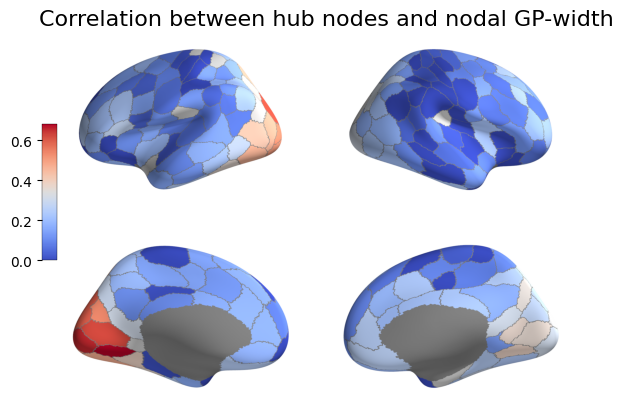

<Figure size 1000x1500 with 0 Axes>

In [9]:
# For only positive or negative correlations

from crosspy.postprocessing.visualization import vis_3d
from crosspy.postprocessing.visualization import utils
import pylab as plt
import os
import os.path as op
import numpy as np
import pickle
import glob

import pandas as pd
import itertools
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import pandas as pd

def get_subsystem(parcel_name, use_hemi=True):
    if ('LH' in parcel_name) or ('RH' in parcel_name):
        tokens = parcel_name.split('_')
        if use_hemi:
            return '_'.join(tokens[1:3])
        else:
            return tokens[2]       
    return 'subcortical'


data_directory = "//home.org.aalto.fi/knapics1/data/Desktop/Courses/Thesis/brainplots/"
file_pattern = "brain_sign_data_*.npy"
#data_directory_out = "//home.org.aalto.fi/knapics1/data/Desktop/Courses/Thesis/brainplots/plots/"
data_directory_out = "/Users/aleksisormunen/Downloads/Aleksi/master_thesis/brain_plots"
# List all files matching the naming pattern
file_paths = glob.glob(os.path.join(data_directory, file_pattern))
# Working directory:
#subject_path = "//home.org.aalto.fi/knapics1/data/Desktop/Courses/Thesis/triton_data/fsaverage/" # parcels
subject_path = "/Users/aleksisormunen/Downloads/Aleksi/master_thesis/fsaverage" # parcels

targets = ['ContA', 'ContB', 'ContC', 'DefaultA', 'DefaultB', 'DefaultC',
       'DorsAttnA', 'DorsAttnB', 'LimbicA', 'LimbicB', 'SalVentAttnA',
       'SalVentAttnB', 'SomMotA', 'SomMotB', 'TempPar', 'VisCent',
       'VisPeri', 'subcortical']

brain_surf_lh = vis_3d.BrainSurface(subject_path, parcellation='Schaefer2018_200Parcels_17Networks_order',
                             hemis=['lh'], surface='inflated')
brain_surf_rh = vis_3d.BrainSurface(subject_path, parcellation='Schaefer2018_200Parcels_17Networks_order',
                             hemis=['rh'], surface='inflated')

surf_parcel_names = brain_surf_lh.parcel_names[1:] + brain_surf_rh.parcel_names[1:]
indexes = np.argsort(surf_parcel_names)

parcel_names = list()

#with open('//home.org.aalto.fi/knapics1/data/Desktop/Courses/Thesis/triton_data/derivatives/text_files/17_200/fs_yeo.txt', 'r') as fin:
with open('/Users/aleksisormunen/Downloads/Aleksi/master_thesis/text_files/17_200/fs_yeo.txt', 'r') as fin:
    for line in filter(lambda x: len(x.strip()) > 0, fin):
        _, name, *_ = line.split()
        
        if name.lower() != 'unknown':
            parcel_names.append(name)
parcel_names = parcel_names[:200]
indexes_data = np.argsort(parcel_names)

values = np.random.normal(0.1, 0.01, (200))
path_dir = "/Users/aleksisormunen/Downloads/Aleksi/master_thesis/correlation_data/"

name_file = "hub_values_correlations"

data = np.load(f"{path_dir}{name_file}.npy")
#data = np.load(f"{path_dir}{name_file}.npy")[:200]

data_sort = data[indexes_data]
values[indexes] = data_sort

brain_3d_surfaces = [brain_surf_lh, brain_surf_rh]

fig, axes = plt.subplots(ncols=2, nrows=2)

values_to_plot = values[np.abs(values) > 0]
parcel_names_to_plot = [n for (v, n) in zip(values, surf_parcel_names) if np.abs(v) > 0]

limits = (0,np.max(np.abs(values)))
if np.max(values) == 0:
    limits=(-0,0.3)

# Draw the four views with the updated values and title
utils.draw_four_views(axes, values_to_plot, parcel_names_to_plot, brain_3d_surfaces, n_parcels=200, title_kwargs={'fontsize': 16},
                      cmap='coolwarm', title="Correlation between hub nodes and nodal GP-width", norm_values=limits)


cmap_obj = plt.get_cmap('coolwarm')
norm_obj = mpl.colors.Normalize(*limits)

subsystem_colors = cmap_obj(norm_obj(values_to_plot))

# Save the figure
output_file_path = os.path.join(data_directory_out, f"{name_file}_brainplot.png")
print(values)

use_hemi = False
subsystem_names = [get_subsystem(n, use_hemi=use_hemi) for n in parcel_names_to_plot]
encoder = LabelEncoder().fit(subsystem_names)
subsystems_encoded = encoder.transform(subsystem_names)
n_subsystems = max(subsystems_encoded) + 1
print(parcel_names_to_plot)
print(subsystem_names)
print(subsystems_encoded)


fig = plt.figure(figsize=(10, 15), constrained_layout=True)
fig.text(0.5, 0.03, set(subsystem_names), ha='center', fontsize=8)
for sidx, (sname, scolor) in enumerate(zip(set(subsystem_names), subsystem_colors)):
    fig.text(0.05 + sidx/10, 0.030, sname, color=scolor, fontsize=15)



print(set(subsystem_names))
#plt.savefig(output_file_path, dpi=150,bbox_inches='tight')